In [1]:
########################################
#Nicholas Randall                      
#Code for Master Thesis 2017           
########################################
from scipy import signal, fftpack
import numpy as np
import math
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
import pandas as pd
from sklearn import preprocessing
from glob import glob
%matplotlib inline

In [6]:
filenames = sorted(glob('D:/Nicholas_MSc/Data/10-02-2107/C37118-*.csv'))
df = pd.DataFrame()

In [7]:
filenames

['D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204000000-20170204003602.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204003602-20170204011203.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204011203-20170204014802.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204014802-20170204022402.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204022402-20170204030002.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204030002-20170204033604.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204033604-20170204041157.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204041157-20170204044800.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204044800-20170204052358.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204052358-20170204055949.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204055949-20170204063548.csv',
 'D:/Nicholas_MSc/Data/10-02-2107\\C37118-12-SIG-20170204063548-2

In [8]:
for name in filenames:
    print(name)
    # Pandas method to read data from .csv into a dataframe
    temp = pd.read_csv(name,
                       delimiter=',',
                       skiprows=2,
                       names=['Date',
                              'Time (GMT)',
                              'Status',
                              'Frequency',
                              'V1VPM Magnitude',
                              'V1VPM Angle',
                              'I1YPM Magnitude',
                              'I1YPM Angle'])
    df = df.append(temp, ignore_index=True)

D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204000000-20170204003602.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204003602-20170204011203.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204011203-20170204014802.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204014802-20170204022402.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204022402-20170204030002.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204030002-20170204033604.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204033604-20170204041157.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204041157-20170204044800.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204044800-20170204052358.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204052358-20170204055949.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204055949-20170204063548.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-12-SIG-20170204063548-20170204071135.csv
D:/Nicholas_MSc/Data/10-02-2107\C37118-1

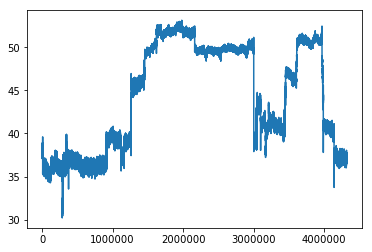

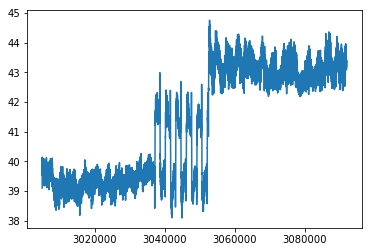

In [13]:
Phi = df['V1VPM Angle'] - df['I1YPM Angle']
power = ( np.sqrt(3) * df['I1YPM Magnitude'] * df['V1VPM Magnitude'] * np.cos(np.radians(Phi)) )/1e6

testset = power[3005000:3092000]

plt.figure(1)
plt.plot(power)

plt.figure(2)
plt.plot(testset)

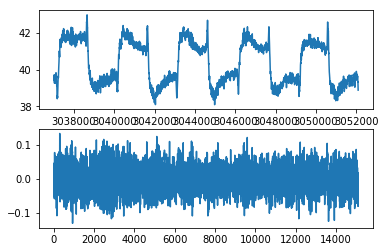

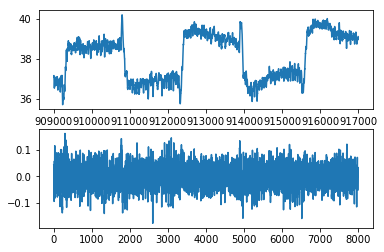

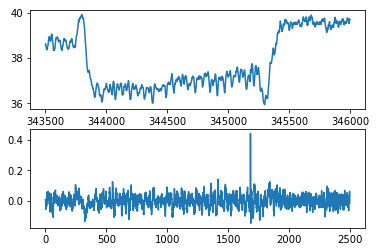

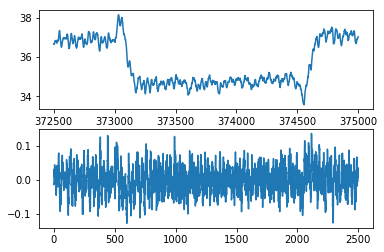

In [14]:
% matplotlib inline #(10:00) 

plt.figure(1)
plt.subplot(211)
plt.plot(power[3037000:3052100])
plt.subplot(212)
plt.plot(np.diff(power[3037000:3052100]))

plt.figure(2)
plt.subplot(211)
plt.plot(power[909000:917000])
plt.subplot(212)
plt.plot(np.diff(power[909000:917000]))

plt.figure(3)
plt.subplot(211)
plt.plot(power[343500:346000])
plt.subplot(212)
plt.plot(np.diff(power[343500:346000]))

plt.figure(4)
plt.subplot(211)
plt.plot(power[372500:375000])
plt.subplot(212)
plt.plot(np.diff(power[372500:375000]))


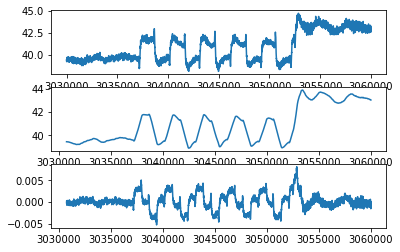

In [15]:
# Moving average filter
event = pd.DataFrame(power[3030000:3060000])
event_ma = event.rolling(window=750).mean()
event_ma_diff = event_ma.diff()

% matplotlib inline
plt.figure(1)
plt.subplot(311)
plt.plot(event)
plt.subplot(312)
plt.plot(event_ma)
plt.subplot(313)
plt.plot(event_ma_diff)

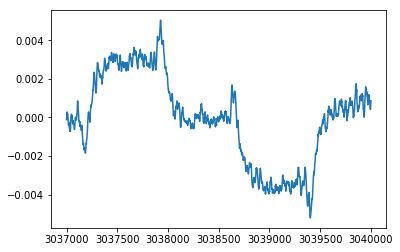

In [16]:
# Define event
event_ma_diff_iso = event_ma_diff.loc[3037000:3040000]
plt.plot(event_ma_diff_iso)

In [17]:
-

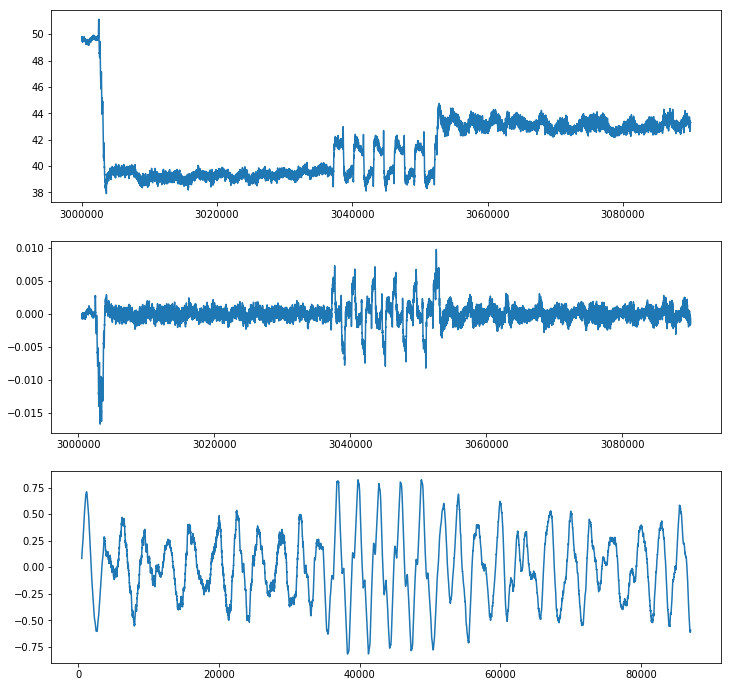

In [19]:
%matplotlib inline
plt.figure(figsize=(12,12))
plt.subplot(311)
plt.plot(power[3000000:3090000])
plt.subplot(312)
plt.plot(signal_ma_diff)
plt.subplot(313)
plt.plot(MF)


# plt.ylim([0, 3])


# Proof of concept below:



In [20]:
event = -0.5*np.ones([1,20])[0]
event = np.reshape(event, [-1,1])
np.shape(event)


(20, 1)

In [21]:
event[10] += 1
event

array([[-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [ 0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [-0.5]])

In [22]:
signal = np.concatenate([event,event,event,event,event], axis=0)
np.shape(signal)

(100, 1)

(-1, 3)

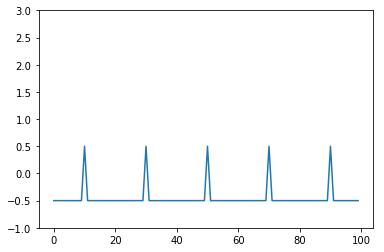

In [23]:
%matplotlib inline
plt.plot(signal)
plt.ylim([-1, 3])

In [24]:
np.dot(signal.T,signal)

array([[ 25.]])

In [25]:
w = len(event)
i = w
r = signal[i-w:i]
len(r)
len(event)

num = np.matmul(r.T, event)
denom = np.sqrt(np.matmul(event.T, event)) * np.sqrt(np.matmul(r.T, r)) 


In [26]:

MF = []
w = len(event)
for i in range(w,len(signal)):
    
    r = signal[i-w:i]
    
    num = np.matmul(r.T, event)
    denom = np.sqrt(np.matmul(event.T, event)) * np.sqrt(np.matmul(r.T, r)) 
    
    MF.append(float(num/denom))
    

(0, 3)

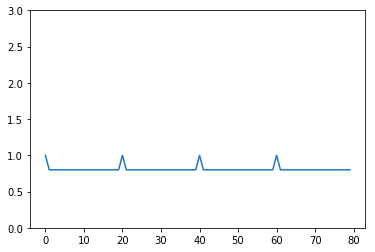

In [27]:
%matplotlib inline
plt.plot(MF)
plt.ylim([0, 3])
# MF